<a href="https://colab.research.google.com/github/anushka711/Covid-19-Notifier/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/twitter_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/twitter_test.csv')

In [ ]:
# label=0 non racist comments
# label=1 racist comments
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [ ]:
train['label'].value_counts()#imbalanced data

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [ ]:
length_train_dataset = train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()
print(length_test_dataset)

0         90
1        101
2         71
3        142
4         93
        ... 
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64


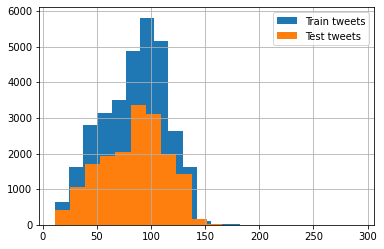

In [ ]:
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend()
plt.grid() 
plt.show()

In [ ]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

(49159, 3)

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [ ]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x:re.sub("[^a-zA-Z]"," ",x))

In [ ]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))  

In [ ]:
combine['tidy_tweet']=combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if w not in stop_words]))

In [ ]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
combine['tidy_tweet']=combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                              [father, dysfunctional, selfish, drags, kids, dysfunction, run]
1    [thanks, lyft, credit, use, cause, offer, wheelchair, vans, pdx, disapointed, getthanked]
2                                                                            [bihday, majesty]
3                                                                    [model, love, take, time]
4                                                            [factsguide, society, motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

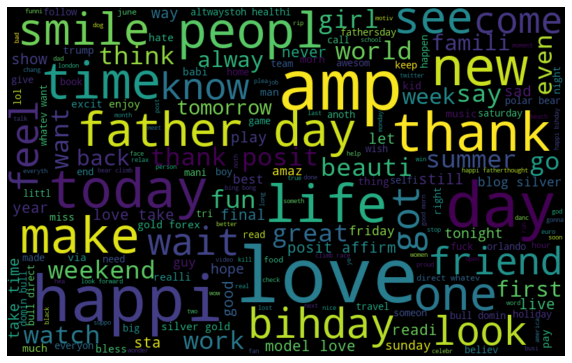

In [ ]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

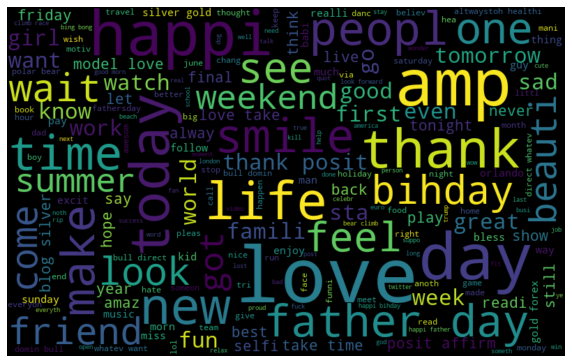

In [ ]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

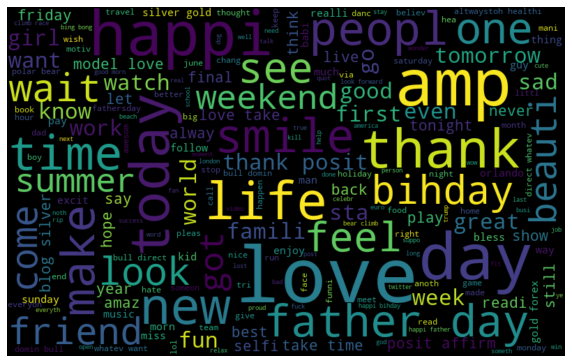

In [ ]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [ ]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

In [ ]:
#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

In [ ]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],test_size=0.2, random_state=69)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

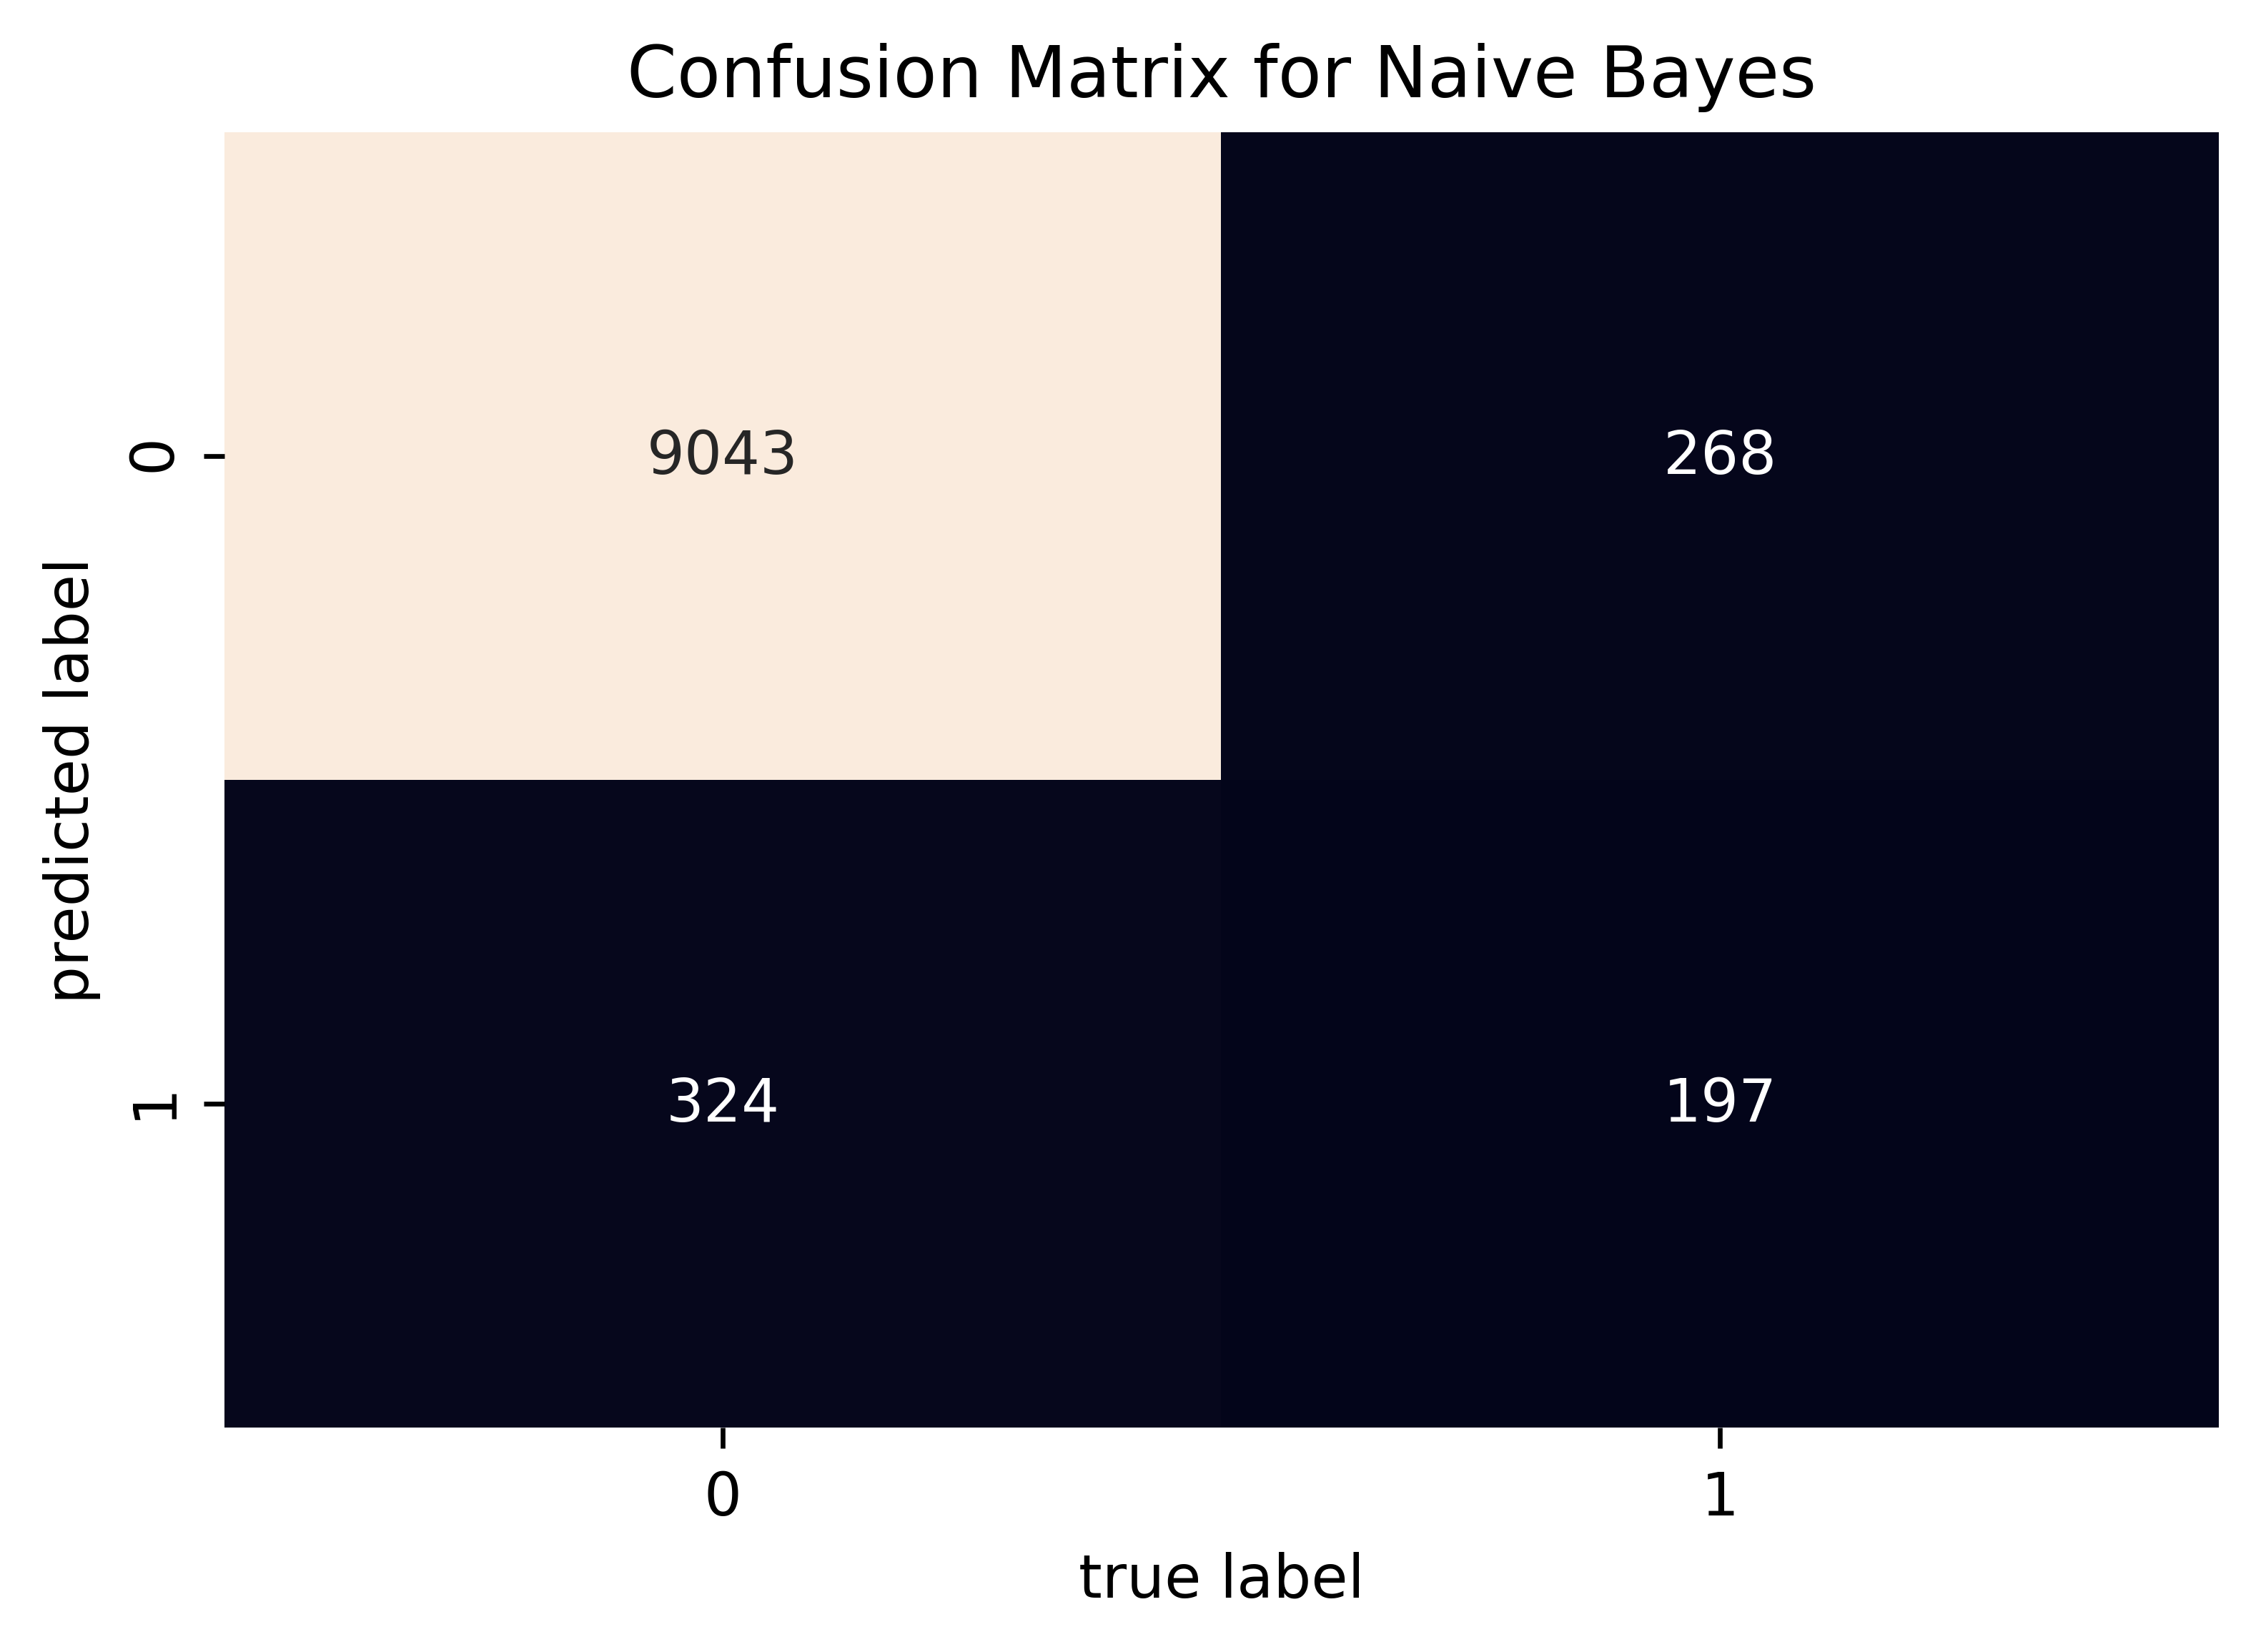

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9397884458909682


In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

In [ ]:
#Deployment Web App
import streamlit as 
